# Exercise 1: The Iris Dataset

In [14]:
import requests
import csv
dta = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data").text
headers = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'class']

def write_csv(dta, headers):
  data_rows = dta.strip().split('\n')
  two_dimension_array = []
  for data_row in data_rows:
    array = data_row.split(',')
    two_dimension_array.append(array)
  with open ("./csvfile.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(two_dimension_array)

In [15]:
write_csv(dta, headers)

In [16]:
import pandas as pd

df = pd.read_csv('./csvfile.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Exercise 2: Pointclouds

In [2]:
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/plane.obj

--2022-09-08 22:47:07--  https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/plane.obj
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2819182 (2.7M) [text/plain]
Saving to: ‘plane.obj’

plane.obj           100%[===================>]   2.69M  --.-KB/s    in 0.07s   

2022-09-08 22:47:08 (40.0 MB/s) - ‘plane.obj’ saved [2819182/2819182]



In [3]:
def input_vertices():
  vertices = []
  faces = []
  vert = {}
  with open('./plane.obj', 'r') as f:
    lines = f.readlines()
    for line in lines:
      coord = line.split()
      if coord[0] == 'v':
        coord.remove('v')
        float_coord = [float(i) for i in coord]
        vertices.append(float_coord)
      elif coord[0] == 'f':
        coord.remove('f')
        for i, value in enumerate(coord):
          if value.find('/') != -1:
            values = value.split('/')
            coord[i] = values[0]
        int_coord = [int(i) for i in coord]
        faces.append(int_coord)
    vert['vertices'] = vertices
    vert['faces'] = faces
  return vert

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_point_cloud(verts):
  verts = np.array(verts)
  fig = plt.figure(figsize=(5,5))
  ax = Axes3D(fig, azim=-90, elev=0)
  ax.scatter3D(
      verts[:, 0],
      verts[:, 2],
      verts[:, 1]
  )
  ax.set_xlabel('x')
  ax.set_ylabel('z')
  ax.set_zlabel('y')

  plt.show()

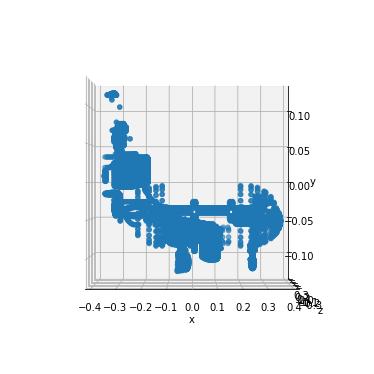

In [6]:
vert = input_vertices()
vert = vert['vertices']
plot_point_cloud(vert)

# Excercise 3: Classes

In [11]:
class Car():

  def __init__(self, color, model, year, max_speed, mileage, current_speed):
    self.color = color
    self.model = model
    self.year = year
    self.max_speed = max_speed
    self.mileage = mileage
    self.current_speed = current_speed
  
  def accelerate(self, x):
    if ((self.current_speed + x) <= self.max_speed):
      self.current_speed += x
    else:
      self.current_speed = self.max_speed
    print(self.current_speed)

  def max_speed_reached(self):
    if self.current_speed == self.max_speed:
      return True
    else:
      return False

  def car_is_stopped(self):
    if self.current_speed == 0:
      return True
    else:
      return False
  
  def brake(self, x):
    if ((self.current_speed - x) >= 0):
      self.current_speed -= x
    else:
      self.current_speed = 0
    print(self.current_speed)

In [12]:
my_favorite_car = Car("Beige", "Tacoma", 2016, 130, 18, 0)

In [13]:
while (my_favorite_car.max_speed_reached() != True):
  my_favorite_car.accelerate(10)
while (my_favorite_car.car_is_stopped() != True):
  my_favorite_car.brake(10)

10
20
30
40
50
60
70
80
90
100
110
120
130
120
110
100
90
80
70
60
50
40
30
20
10
0
